In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
bank_details = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
bank_details

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [19]:
bank_details.isnull().values.any()
bank_details.describe()
list(bank_details.columns)

['ID',
 'Age',
 'Experience',
 'Income',
 'ZIP Code',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Personal Loan',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard']

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Experience'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'ZIP Code'}>,
        <AxesSubplot:title={'center':'Family'}>,
        <AxesSubplot:title={'center':'CCAvg'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Mortgage'}>,
        <AxesSubplot:title={'center':'Personal Loan'}>,
        <AxesSubplot:title={'center':'Securities Account'}>,
        <AxesSubplot:title={'center':'CD Account'}>],
       [<AxesSubplot:title={'center':'Online'}>,
        <AxesSubplot:title={'center':'CreditCard'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

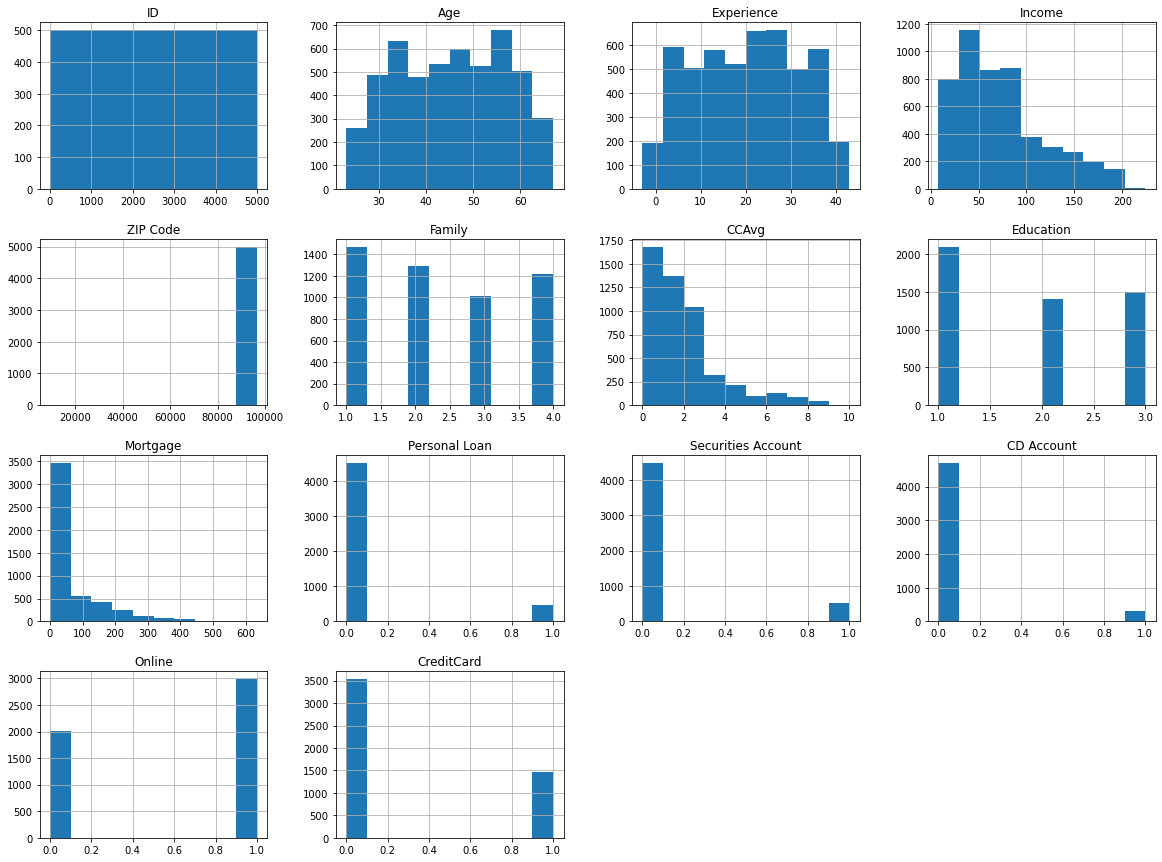

In [23]:
%matplotlib inline
bank_details.hist(figsize=(20,15))

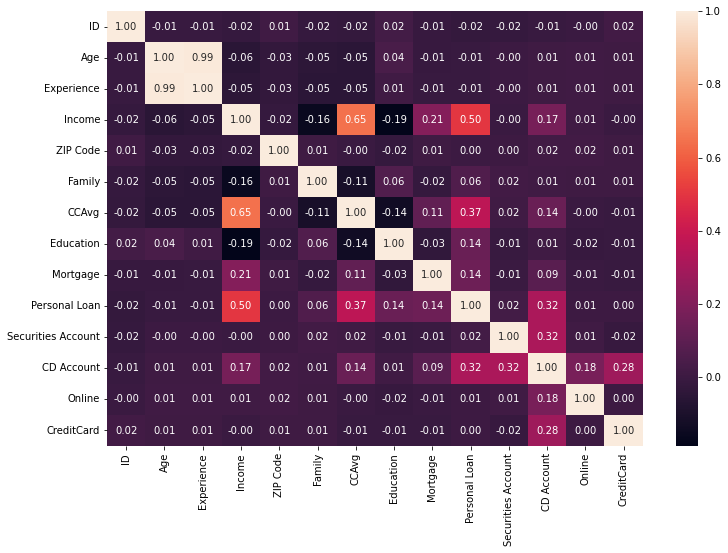

In [35]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap((bank_details.corr()), annot=True, fmt=".2f")
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
X = bank_details.drop(['Personal Loan'], axis=1)
y = bank_details['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [32]:
lr.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
score_train = lr.score(X_train, y_train)
score_test = lr.score(X_test, y_test)
[score_train, score_test]

[0.9108571428571428, 0.8966666666666666]

In [34]:
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1348
           1       0.49      0.36      0.41       152

    accuracy                           0.90      1500
   macro avg       0.71      0.66      0.68      1500
weighted avg       0.88      0.90      0.89      1500

